###### Veronica Morante Pindado

## 1. Cargamos df de preguntas 

In [1]:
import pandas as pd
import requests as rq
import json

def add_row(df, question,id): 
    if( 'user_id' in question["owner"]):
        user_id = int(question["owner"]["user_id"])
        user_q_reputation = int(question["owner"]["reputation"])
    else:
        user_id =None
        user_q_reputation=None
    question_id = int(question["question_id"])
    title = question["title"]
    is_answered = question["is_answered"]
    view_count = int(question["view_count"])
    creation_date = int(question["creation_date"])
    
    df.loc[id] = [question_id,user_id, title, is_answered,view_count,creation_date,user_q_reputation]
    


In [2]:
questionsframe = pd.DataFrame(columns=["question_id","user_id", "title", "is_answered","view_count","creation_date","user_q_reputation"])
i=0
for p in range(1, 12):
    
    page = rq.get("https://api.stackexchange.com/2.2/questions?key=G)IJChtVSsnHFTMnoMyP3w((&page="+str(p)+"&pagesize=100&order=desc&sort=activity&tagged=python&site=stackoverflow")
    questions = json.loads(page.text)
    for row in questions["items"]:
        add_row(questionsframe, row,i)
        i+=1

print(len(questionsframe))

1100


In [3]:
## Borramos valores incompletos
questionsframe = questionsframe.dropna()
print(questionsframe.values.shape)

(1099, 7)


In [4]:
#Cambiamos los tipos de las columnas
questionsframe['view_count']=questionsframe['view_count'].astype(int)
questionsframe['creation_date']=questionsframe['creation_date'].astype(int) 
questionsframe['question_id']=questionsframe['question_id'].astype(int)
questionsframe['user_q_reputation']=questionsframe['user_q_reputation'].astype(int) 
questionsframe['user_id']=questionsframe['user_id'].astype(int) 
questionsframe['creation_date']=pd.to_datetime(questionsframe['creation_date'],unit='s')

questionsframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099 entries, 0 to 1099
Data columns (total 7 columns):
question_id          1099 non-null int32
user_id              1099 non-null int32
title                1099 non-null object
is_answered          1099 non-null object
view_count           1099 non-null int32
creation_date        1099 non-null datetime64[ns]
user_q_reputation    1099 non-null int32
dtypes: datetime64[ns](1), int32(4), object(2)
memory usage: 51.5+ KB


In [5]:
questionsframe.head(10)

,question_id,user_id,title,is_answered,view_count,creation_date,user_q_reputation
0,54774079,8011949,background segmentation or background extration,False,17,2019-02-19 20:02:08,1
1,54793053,4830458,Removing quotes when writing list items to CSV,False,2,2019-02-20 18:31:49,154
2,54793052,6253981,Using python print max and min values and date...,False,2,2019-02-20 18:31:47,3
3,34251182,5674520,Reading nastran grid with exponent coordinate,False,254,2015-12-13 12:41:31,6
4,54791991,2154520,Unable to print directory list in a column wit...,False,17,2019-02-20 17:18:31,3
5,54793036,764182,DRF: Serializer for heterogneous list of relat...,False,3,2019-02-20 18:30:21,2421
6,54793035,3553228,python regex re.compile and re.search,False,11,2019-02-20 18:30:16,1005
7,54793033,10401979,python tuple and enum,False,9,2019-02-20 18:30:07,1
8,54602391,5982482,Streaming JSON Objects From a Large Compressed...,True,58,2019-02-09 01:42:58,56
9,54789425,7765237,Query for a row with a unique set of children ...,False,16,2019-02-20 15:07:12,1


#### Pregunta mas antigua no contestada

In [6]:
questionsframe[questionsframe['is_answered']==False].sort_values(by=['creation_date']).head(1)

,question_id,user_id,title,is_answered,view_count,creation_date,user_q_reputation
832,11023990,1137778,Python - run Excel macro,False,5132,2012-06-13 22:03:42,661


##### Diferentes graficas para ver la distribucion: la primera muestra un histograma de las visitas, la siguiente muestra el numero de visitas respecto al tiempo  y la ultima muestra la densidad de las visitas

In [7]:
import matplotlib.pyplot as plt
import numpy as np

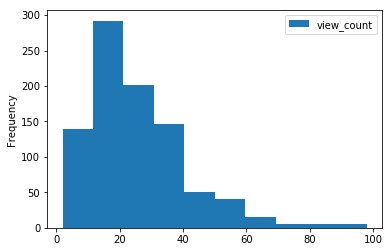

In [8]:
dataclean = questionsframe[questionsframe["view_count"]<100]

dataclean.plot(y="view_count", kind="hist", bins=10)
plt.show()

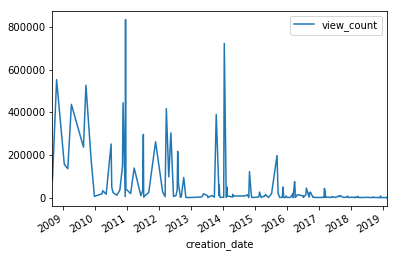

In [9]:
%matplotlib inline
questionsframe.plot(x='creation_date',y='view_count')

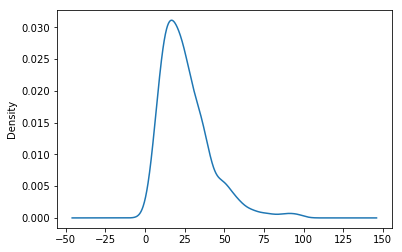

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
dataclean['view_count'].plot(kind="kde")

### Cargamos las respuestas

In [11]:
def add_Answer(df, question,id):     
    answer_id = int(question["answer_id"])    
    question_id = int(question["question_id"])
    score = question["score"]
    date_answer = question["creation_date"]
    if('user_id' in question["owner"]):
        user_answer = int(question["owner"]["user_id"])
        reputation_answer=int(question["owner"]["reputation"])
    else:
        user_answer=None
        reputation_answer=None  
    
    
    df.loc[id] = [question_id,answer_id, score, date_answer,user_answer,reputation_answer]

In [12]:

answersframe = pd.DataFrame(columns=["question_id","answer_id", "score","date_answer", "user_answer","reputation_user_a"])
questionTrue=questionsframe[questionsframe['is_answered']==True]
i=0 ## es el indice en el nuevo df
j=0 ## contador que sirve para separar las question id en grupos de 100
numeroDeFila=1 ## vamos contando el numero de filas, para que los resultantes en la ultima fila del df llame a la api
listQuestions="" ## string que contiene las question id sepradas por ;
for index,fila in questionTrue.iterrows():
    j+=1
    numeroDeFila+=1
    listQuestions += str(questionTrue.loc[index]['question_id']) +";"    
    if(i==len(questionTrue)):
        print(listQuestions)
    if(j == 100 or (len(questionTrue)==numeroDeFila)):
        npage=1 ## numero de pagina para llamar a la api
        while True:            
            page = rq.get("https://api.stackexchange.com/2.2/questions/"+listQuestions[0:-1]+"/answers?key=G)IJChtVSsnHFTMnoMyP3w((&page="+str(npage)+"&order=desc&sort=votes&site=stackoverflow")
            questions = json.loads(page.text)           
            for rowQuestion in questions["items"]:                
                add_Answer(answersframe, rowQuestion,i)                
                i+=1
                
            npage+=1
            if(questions['has_more']==False):
                break
        j=0        
        listQuestions=""      

print(len(answersframe))

1319


In [13]:
## Nos quedamos con la respuesta mas valorada a cada pregunta
answersframe = answersframe.sort_values('score', ascending=False).groupby(['question_id']).head(1).sort_index()
len(answersframe)

471

In [14]:
answersframe.head(10)

,question_id,answer_id,score,date_answer,user_answer,reputation_user_a
0,1436703,2626364,2365,1271120212,122683,25052
3,10589620,10589674,327,1337022986,683020,20397
4,19377969,19378497,280,1381831791,1050484,6476
5,6578986,15882054,268,1365432017,328565,11666
8,3211041,3211047,179,1278664228,178761,37333
11,35817,847800,140,1242043600,4421,23379
18,39691902,40295999,63,1477612770,4678222,2913
22,3647546,3647560,51,1283716572,61974,591324
24,12788217,12788284,42,1349724945,594589,38417
25,16739065,18471343,27,1377622412,1538554,1100


In [15]:
answersframe = answersframe.dropna()
print(answersframe.values.shape)

(470, 6)


In [16]:
answersframe['reputation_user_a']=answersframe['reputation_user_a'].astype(int)
answersframe['user_answer']=answersframe['user_answer'].astype(int) 
answersframe['question_id']=answersframe['question_id'].astype(int)
answersframe['date_answer']=pd.to_datetime(answersframe['date_answer'],unit='s')

answersframe.info()
answersframe.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 1313
Data columns (total 6 columns):
question_id          470 non-null int32
answer_id            470 non-null object
score                470 non-null object
date_answer          470 non-null datetime64[ns]
user_answer          470 non-null int32
reputation_user_a    470 non-null int32
dtypes: datetime64[ns](1), int32(3), object(2)
memory usage: 20.2+ KB


,question_id,answer_id,score,date_answer,user_answer,reputation_user_a
0,1436703,2626364,2365,2010-04-13 00:56:52,122683,25052
3,10589620,10589674,327,2012-05-14 19:16:26,683020,20397
4,19377969,19378497,280,2013-10-15 10:09:51,1050484,6476
5,6578986,15882054,268,2013-04-08 14:40:17,328565,11666
8,3211041,3211047,179,2010-07-09 08:30:28,178761,37333
11,35817,847800,140,2009-05-11 12:06:40,4421,23379
18,39691902,40295999,63,2016-10-27 23:59:30,4678222,2913
22,3647546,3647560,51,2010-09-05 19:56:12,61974,591324
24,12788217,12788284,42,2012-10-08 19:35:45,594589,38417
25,16739065,18471343,27,2013-08-27 16:53:32,1538554,1100


## Union de las preguntas con las respuestas

In [17]:
questionsframe=pd.merge(questionsframe,answersframe, on='question_id',how="outer")
questionsframe

,question_id,user_id,title,is_answered,view_count,creation_date,user_q_reputation,answer_id,score,date_answer,user_answer,reputation_user_a
0,54774079,8011949,background segmentation or background extration,False,17,2019-02-19 20:02:08,1,NaN,NaN,NaT,NaN,NaN
1,54793053,4830458,Removing quotes when writing list items to CSV,False,2,2019-02-20 18:31:49,154,NaN,NaN,NaT,NaN,NaN
2,54793052,6253981,Using python print max and min values and date...,False,2,2019-02-20 18:31:47,3,NaN,NaN,NaT,NaN,NaN
3,34251182,5674520,Reading nastran grid with exponent coordinate,False,254,2015-12-13 12:41:31,6,NaN,NaN,NaT,NaN,NaN
4,54791991,2154520,Unable to print directory list in a column wit...,False,17,2019-02-20 17:18:31,3,NaN,NaN,NaT,NaN,NaN
5,54793036,764182,DRF: Serializer for heterogneous list of relat...,False,3,2019-02-20 18:30:21,2421,NaN,NaN,NaT,NaN,NaN
6,54793035,3553228,python regex re.compile and re.search,False,11,2019-02-20 18:30:16,1005,NaN,NaN,NaT,NaN,NaN
7,54793033,10401979,python tuple and enum,False,9,2019-02-20 18:30:07,1,NaN,NaN,NaT,NaN,NaN
8,54602391,5982482,Streaming JSON Objects From a Large Compressed...,True,58,2019-02-09 01:42:58,56,54620098,1,2019-02-10 19:22:21,355230.0,67805.0
9,54789425,7765237,Query for a row with a unique set of children ...,False,16,2019-02-20 15:07:12,1,NaN,NaN,NaT,NaN,NaN


### Obtenemos todos los usuarios

In [18]:
usuarios=pd.concat([questionsframe['user_id'].dropna(), questionsframe['user_answer'].dropna()])
usuarios=usuarios.unique()
usuarios

array([ 8011949.,  4830458.,  6253981., ...,  6509519.,  9888500.,
        4909087.])

In [19]:
len(usuarios)

1409

In [20]:
## Obtenemos si es el usuario que responde o el que contesta
maximoUsuarios=questionsframe[['user_q_reputation','reputation_user_a']].idxmax().idxmax()
maximoUsuarios

'user_q_reputation'

In [22]:
#Obtenemos el resultado de la fila en la que se encuentra el usuario con mas reputacion
maximoUsuario=questionsframe.loc[questionsframe[['user_q_reputation','reputation_user_a']].idxmax().max()]
maximoUsuario

question_id                                              25660064
user_id                                                    298479
title                In which order are pytest fixtures executed?
is_answered                                                  True
view_count                                                   6863
creation_date                                 2014-09-04 07:53:17
user_q_reputation                                          239525
answer_id                                                38611500
score                                                          15
date_answer                                   2016-07-27 11:18:54
user_answer                                                758345
reputation_user_a                                           44049
Name: 1067, dtype: object

### Pintamos el usuario con mas reputacion del dataframe

In [23]:
if(maximoUsuarios =='user_q_reputation'): 
    maximo=maximoUsuario['user_id']
else: 
    maximo=maximoUsuario['user_answer']
print(maximo)

298479


In [24]:
minimoUsuarios=questionsframe[['user_q_reputation','reputation_user_a']].idxmin().idxmin()
minimoUsuarios

'user_q_reputation'

In [25]:
minimoUsuario=questionsframe.loc[questionsframe[['user_q_reputation','reputation_user_a']].idxmin().min()]
minimoUsuario

question_id                                                 54774079
user_id                                                      8011949
title                background segmentation or background extration
is_answered                                                    False
view_count                                                        17
creation_date                                    2019-02-19 20:02:08
user_q_reputation                                                  1
answer_id                                                        NaN
score                                                            NaN
date_answer                                                      NaT
user_answer                                                      NaN
reputation_user_a                                                NaN
Name: 0, dtype: object

### Pintamos el usuario con menor reputacion del df

In [26]:
if(minimoUsuarios =='user_q_reputation'): 
    minimo=minimoUsuario['user_id']
else: 
    minimo=minimoUsuario['user_answer']
print(minimo)


8011949


In [27]:
##obtenemos mas informacion del usuario con mayor reputacion y con menor
usuarios=str(maximo)+";"+str(minimo)
page = rq.get("https://api.stackexchange.com/2.2/users/"+usuarios+"?key=G)IJChtVSsnHFTMnoMyP3w((&order=desc&sort=reputation&site=stackoverflow")
users = json.loads(page.text)
print(json.dumps(users, indent=2))

{
  "items": [
    {
      "link": "https://stackoverflow.com/users/298479/thiefmaster",
      "display_name": "ThiefMaster",
      "reputation_change_day": 95,
      "creation_date": 1269184441,
      "location": "Germany",
      "reputation_change_year": 2931,
      "website_url": "https://www.metalspy.de",
      "reputation": 239525,
      "reputation_change_month": 1042,
      "user_type": "moderator",
      "accept_rate": 87,
      "reputation_change_quarter": 2931,
      "badge_counts": {
        "gold": 61,
        "bronze": 559,
        "silver": 466
      },
      "user_id": 298479,
      "last_access_date": 1550673841,
      "account_id": 113304,
      "is_employee": false,
      "last_modified_date": 1550228707,
      "reputation_change_week": 240,
      "profile_image": "https://www.gravatar.com/avatar/bc66db28aa7c3fa8e4ce4238b696dee9?s=128&d=identicon&r=PG"
    },
    {
      "display_name": "Hernandes Erick",
      "reputation_change_day": 0,
      "creation_date": 149481